In [1]:
from network import Agent
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
env = gym.make('CartPole-v1')
agent = Agent(input_dim=4, n_action=2, alpha=0.0003)
score_history = []
num_episodes = 1500

for i in range(num_episodes):
    score = 0
    done = False
    observation, _ = env.reset()
    # print(observation)
    while not done:
        action = agent.choose_action(observation)
        new_observation, reward, done, info, _ = env.step(action)
        agent.store_reward(reward)
        score += reward
        observation = new_observation
    agent.learn()
    
    score_history.append(score)
    print('episode: ', i,'score: %.2f' % score)

/Users/zhanghantao/Desktop/basic_machine_learning_algorithms/reinforcement_learning/REINFORCE/network.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(self.fc3(x))


episode:  0 score: 10.00
episode:  1 score: 19.00
episode:  2 score: 17.00
episode:  3 score: 21.00
episode:  4 score: 21.00
episode:  5 score: 11.00
episode:  6 score: 32.00
episode:  7 score: 13.00
episode:  8 score: 16.00
episode:  9 score: 43.00
episode:  10 score: 18.00
episode:  11 score: 8.00
episode:  12 score: 15.00
episode:  13 score: 15.00
episode:  14 score: 33.00
episode:  15 score: 18.00
episode:  16 score: 14.00
episode:  17 score: 46.00
episode:  18 score: 55.00
episode:  19 score: 16.00
episode:  20 score: 15.00
episode:  21 score: 20.00
episode:  22 score: 17.00
episode:  23 score: 72.00
episode:  24 score: 17.00
episode:  25 score: 22.00
episode:  26 score: 28.00
episode:  27 score: 16.00
episode:  28 score: 37.00
episode:  29 score: 14.00
episode:  30 score: 23.00
episode:  31 score: 52.00
episode:  32 score: 52.00
episode:  33 score: 45.00
episode:  34 score: 33.00
episode:  35 score: 21.00
episode:  36 score: 28.00
episode:  37 score: 16.00
episode:  38 score: 25.

Text(0.5, 1.0, 'Running average of previous 100 episodes')

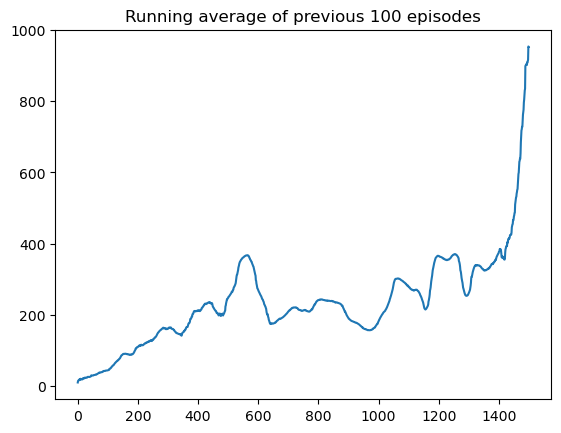

In [3]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-100):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')